# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
One observation that could be obsevered is when Capomulin and Ramicane are persecribed it seems the average tumor size is the smallet compared to other 
drugs that were used. Both drugs averaged in the 40 percentile comepared to the next lowestest which was Propiva in the 52 percentile. This statement is accurate since both 
Ramicane and Capomulin were the two drugs tested the most out of any in the study. During the thest on subject mouse l509 there was a significat decrease
in the mouses tumor size which started at 45.0 mm3 and ultimately reaching a lowestest at 40.2 mm3. However one concering fact about the drug
could be the rise again cancer cells which is shown towards the end of the graph going back up to around 41.5 mm3. So in conclusion the Capomulin
did signficantly drop the tumor size in the mouse however it may not have been as effecient in the prevention of cancer cells over time.

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df=study_results.merge(mouse_metadata)

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
df.groupby('Mouse ID').count().shape


(249, 7)

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df[df.duplicated(subset=['Timepoint','Mouse ID'])==True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df.drop_duplicates(inplace=True,keep=False,subset=['Timepoint','Mouse ID'])

In [6]:
df[df['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
870,g989,25,56.045564,1,Propriva,Female,21,26
871,g989,30,59.082294,1,Propriva,Female,21,26
872,g989,35,62.570880,2,Propriva,Female,21,26


In [7]:
df.drop(labels=[870,871,872],inplace=True)


In [8]:
# Checking the number of mice in the clean DataFrame.
df.groupby('Mouse ID').count().shape

(248, 7)

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
summary=pd.DataFrame(df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])
)
summary.columns=['Average Tumor Volume', 'Median Tumor Volume', 'Tumor Variance','Standard Deviation', 'Standard Error']
summary

,Average Tumor Volume,Median Tumor Volume,Tumor Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

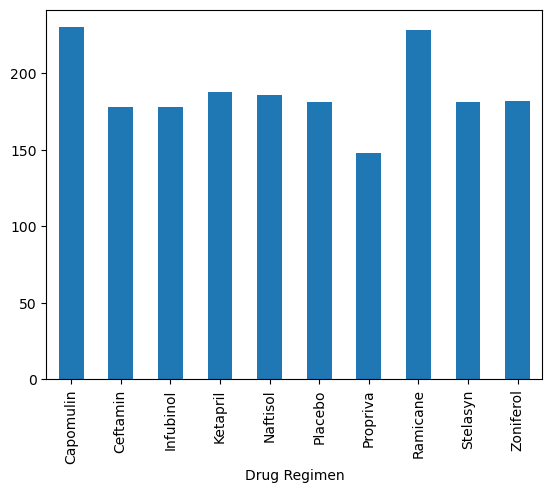

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Mice_Counts=df.groupby('Drug Regimen')['Mouse ID'].count()
Mice_Counts.plot.bar(x='Mouse ID')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

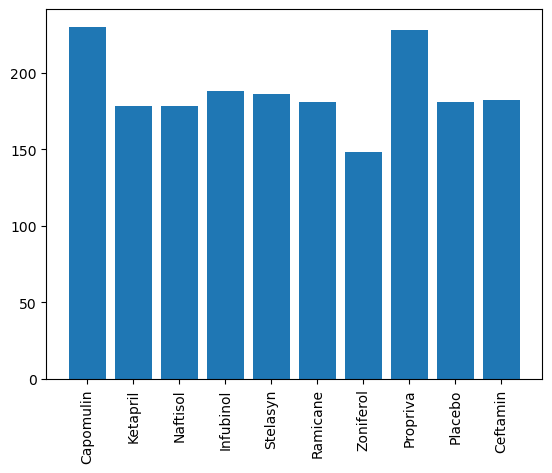

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Mice_Counts=df.groupby('Drug Regimen')['Mouse ID'].count()
plt.bar(df['Drug Regimen'].unique(),Mice_Counts)
plt.xticks(rotation=90)

<AxesSubplot:ylabel='Mouse ID'>

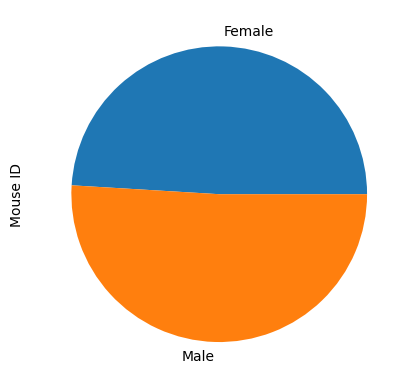

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Mice_Counts=df.groupby('Sex')['Mouse ID'].count()
Mice_Counts.plot.pie(x='Mouse ID')



(array([], dtype=float64), [])

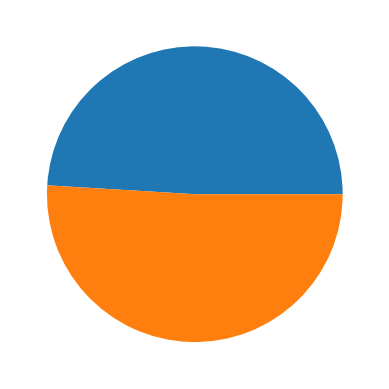

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Mice_Counts=df.groupby('Sex')['Mouse ID'].count()
plt.pie(Mice_Counts)
plt.xticks(rotation=90)

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_df=pd.DataFrame(df.groupby('Mouse ID')['Timepoint'].last())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_df=pd.merge(last_df,df)

In [25]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_List=list(combined_df['Drug Regimen'])
# Create empty list to fill with tumor vol data (for plotting)
Tumor_List=[]
import math
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
first=math.floor(len(combined_df)*.25)
last=math.floor(len(combined_df)*.75)
combined_df['Tumor Volume (mm3)'].sort_values().iloc[first:last]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
drug_regimen_index=combined_df.groupby('Drug Regimen').count().index
drug_regimen=pd.melt(combined_df[['Drug Regimen','Tumor Volume (mm3)']],id_vars=['Drug Regimen'],value_vars=['Tumor Volume (mm3)'])

    
    # add subset 
subsets={}
for drug in drug_regimen_index:
    subsets[drug+'_df']=combined_df[combined_df['Drug Regimen']==drug]
    # Determine outliers using upper and lower bounds
subsets['Capomulin_df']

,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,b128,38.982878,2,Capomulin,Female,9,22
110,45,r554,32.377357,3,Capomulin,Female,8,17
111,45,s185,23.343598,1,Capomulin,Female,3,17
112,45,b742,38.939633,0,Capomulin,Male,7,21
113,45,x401,28.484033,0,Capomulin,Female,16,15
...,...,...,...,...,...,...,...,...
39991,20,t565,39.070214,0,Capomulin,Female,20,17
39992,20,i557,43.967895,0,Capomulin,Female,1,24
39993,20,m957,38.909349,1,Capomulin,Female,3,19
39994,20,f966,30.485985,0,Capomulin,Male,16,17


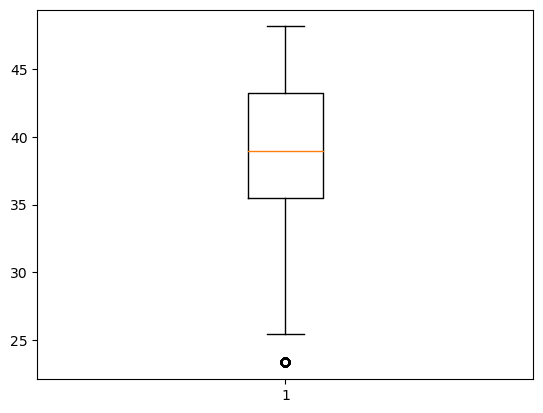

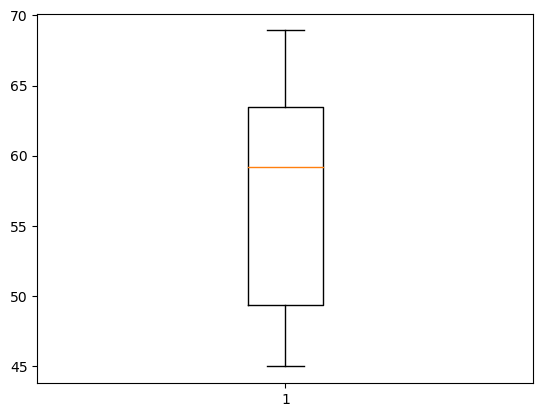

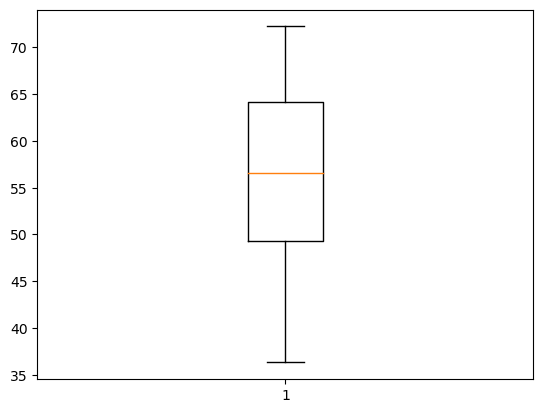

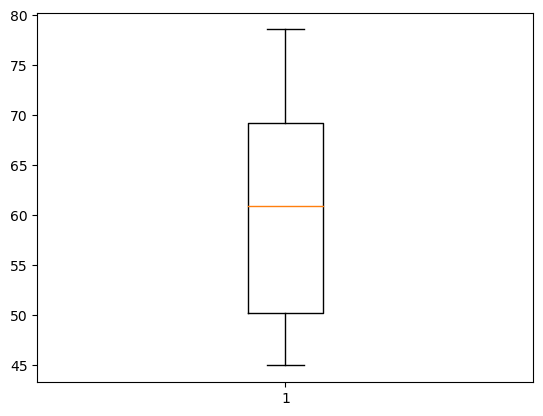

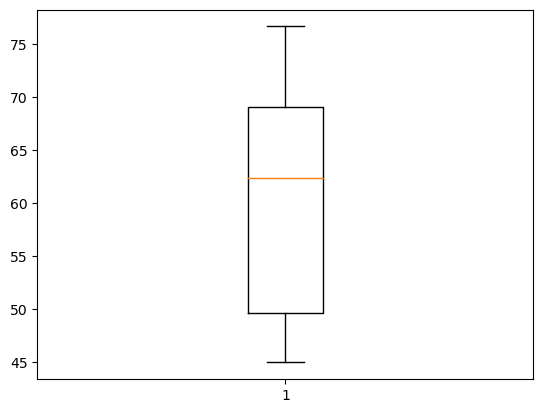

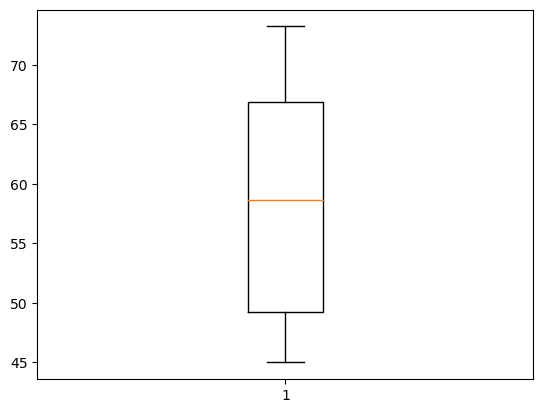

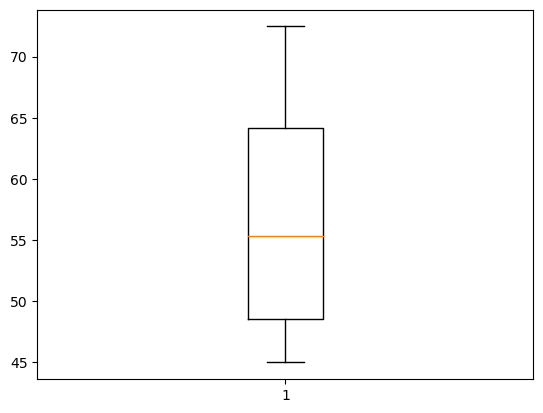

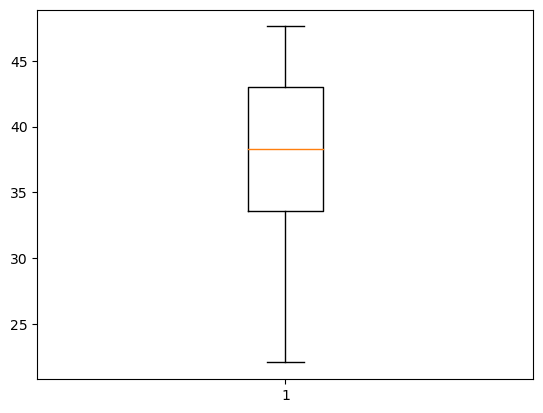

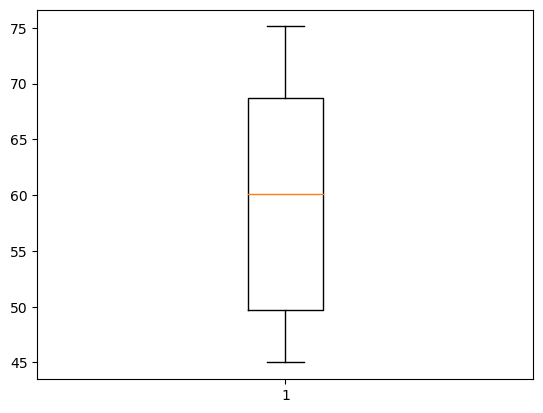

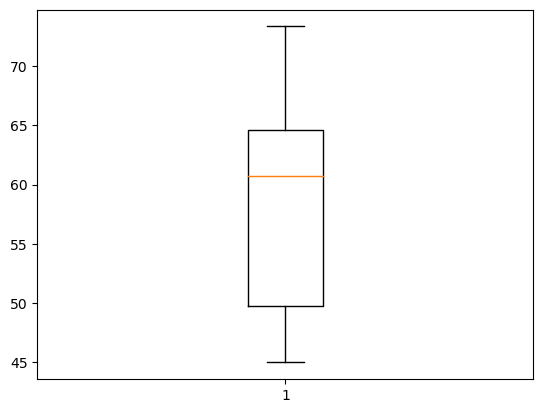

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

for df in subsets:
    plt.boxplot(x=subsets[df]['Tumor Volume (mm3)'])
    plt.show()

## Line and Scatter Plots

,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
16884,45,l509,41.483008,3,Capomulin,Male,17,21
19774,30,l509,44.708055,2,Capomulin,Male,17,21
23307,10,l509,46.759074,0,Capomulin,Male,17,21
25494,25,l509,44.006257,2,Capomulin,Male,17,21
28467,0,l509,45.000000,0,Capomulin,Male,17,21
32007,5,l509,45.851193,0,Capomulin,Male,17,21
33714,40,l509,40.770813,2,Capomulin,Male,17,21
36172,15,l509,47.488599,1,Capomulin,Male,17,21
37857,35,l509,40.207288,2,Capomulin,Male,17,21
39979,20,l509,48.070452,2,Capomulin,Male,17,21


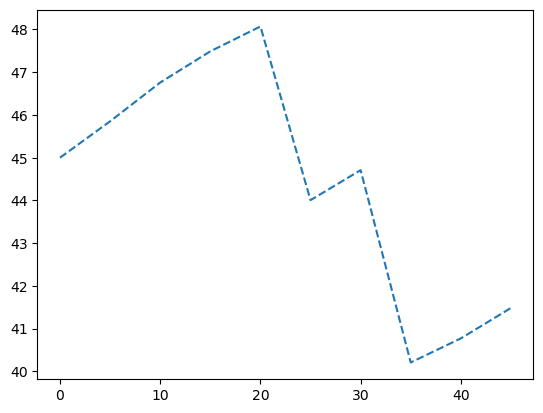

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
temp=combined_df[combined_df['Mouse ID']=='l509'].drop_duplicates(keep='last').sort_values('Timepoint')
plt.plot(temp['Timepoint'],temp['Tumor Volume (mm3)'],'--')
combined_df[combined_df['Mouse ID']=='l509'].drop_duplicates(keep='last')

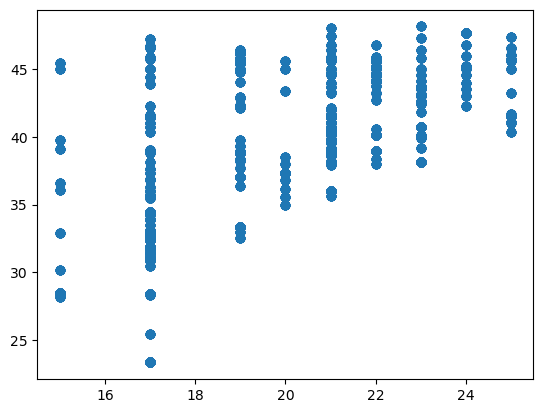

In [48]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(subsets['Capomulin_df']['Weight (g)'],subsets['Capomulin_df']['Tumor Volume (mm3)'])


## Correlation and Regression

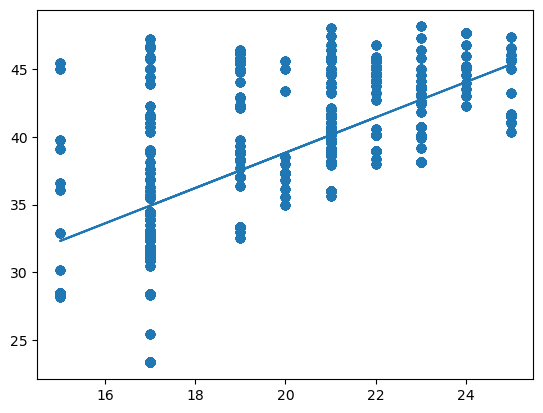

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
lr=LinearRegression()
x=np.array(subsets['Capomulin_df']['Weight (g)']).reshape(-1, 1)
lr.fit (x,subsets['Capomulin_df']['Tumor Volume (mm3)'])
plt.scatter(subsets['Capomulin_df']['Weight (g)'],subsets['Capomulin_df']['Tumor Volume (mm3)'])
plt.plot(x,lr.coef_*x+lr.intercept_)
plt.show()